<a href="https://colab.research.google.com/github/Abhieo07/Basics_ml/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
%tensorflow_version 2.x
print(tf.version)

from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import clear_output
# %tensorflow_version2.x
import tensorflow.compat.v2.feature_column as fc
# from six.moves import urllib

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>


#Classification

In [ ]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

In [ ]:
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES,header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES,header=0)


573/573 [==============================] - 0s 0us/step


In [ ]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [ ]:
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [ ]:
train.shape

(120, 4)

input function

In [ ]:
def input_fn(features, labels,training=True,batch_size=256):
  # convert the inputs to a Dataset
  dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

  # shuffle and repeat if you are in training mode
  if training:
    dataset = dataset.shuffle(1000).repeat()

  return dataset.batch(batch_size)

In [ ]:
my_feature_columns = []
for key in train.keys():
  my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


#Building the Model


*   DNNClassifier
*   LinearClassifier




In [ ]:
from tensorflow_estimator.python.estimator.canned.linear import feature_column
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each
classifier = tf.estimator.DNNClassifier(
    feature_columns = my_feature_columns,
    # Two hidden network of 30 and 10 each
    hidden_units=[30,10],
    # The model must choose between 3 classes
    n_classes = 3
)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


Training

In [ ]:
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000)

In [ ]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))


Test set accuracy: 0.967



Prediction

In [ ]:
def input_fn_pred(features,batch_size=256):
  return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric value as prompted")
for feature in  features:
  valid = True
  while valid:
    val = input(feature + ": ")
    if not val.isdigit():
      valid = False

  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn_pred(predict))
for pred in predictions:
  print(pred)
  class_id = pred['class_ids'][0]
  probability = pred['probabilities'][class_id]

  print('Prediction is "{}" ({:.1f}%)'.format(
      SPECIES[class_id], 100 * probability
  ))

Please type numeric value as prompted
SepalLength: 1.4
SepalWidth: 2.4
PetalLength: 3.4
PetalWidth: 4.4
{'logits': array([-3.7874923, -1.1950837,  1.0234176], dtype=float32), 'probabilities': array([0.00728835, 0.09738632, 0.8953253 ], dtype=float32), 'class_ids': array([2]), 'classes': array([b'2'], dtype=object), 'all_class_ids': array([0, 1, 2], dtype=int32), 'all_classes': array([b'0', b'1', b'2'], dtype=object)}
Prediction is "Virginica" (89.5%)


#Clustering
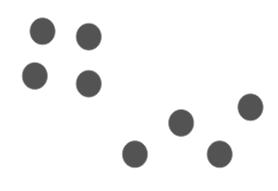

Choose the number of clusters k

The first step in k-means is to pick the number of clusters, k.
Select k random points from the data as centroids

Next, we randomly select the centroid for each cluster. Let’s say we want to have 2 clusters, so k is equal to 2 here. We then randomly select the centroid:
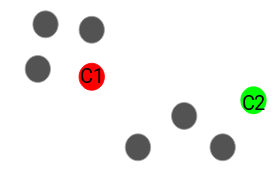

k means
Here, the red and green circles represent the centroid for these clusters.
Assign all the points to the closest cluster centroid
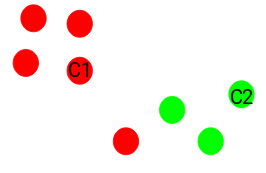


Once we have initialized the centroids, we assign each point to the closest cluster centroid:k means 2
Here you can see that the points closer to the red point are assigned to the red cluster, whereas the points closer to the green point are assigned to the green cluster.
Recompute the centroids of newly formed clusters
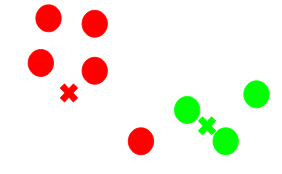


Now, once we have assigned all of the points to either cluster, the next step is to compute the centroids of newly formed clusters:
k means 3
Here, the red and green crosses are the new centroids.
Repeat steps 3 and 4

We then repeat steps 3 and 4:
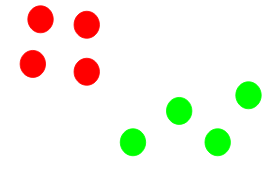
k means 4
The step of computing the centroid and assigning all the points to the cluster based on their distance from the centroid is a single iteration. But wait – when should we stop this process? It can’t run till eternity, right?
